In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import animation
from IPython.display import Video

In [2]:
import Euler.Periodic_2D as elr

## 2D Advection

For the [1D Advection](https://github.com/dhruvbhagtani2105/EMSC-8033-project/blob/1D_cases/1D_Advection.ipynb) case, we used a 1D domain, and using the Euler explicit discretisation method, showed how the error fades away as the number of points in the domain increases. For the 2D case, we need to be aware of two different advection velocities, one in each direction. In fact, this can be an idealised version of an oceanic basin, with surface waves of a particular frequency propagating in the domain.

As an example, we use a sine wave, along with periodic boundary conditions at all four lateral boundaries. The tracer $\phi$ that propagates in this domain is given by:
$$ \frac{\partial \phi}{\partial t} + a_x \frac{\partial \phi}{\partial x} + a_y \frac{\partial \phi}{\partial y} = 0, $$

where $a_x$ and $a_y$ are the advection speeds in the x and y directions respectively. One solution to this equation is:

$$ \phi(x,y,t) = sin(\lambda_1 (x - a_x t) + \lambda_2 (y - a_y t)), $$

where $\lambda_1 = \frac{2 \pi}{L_x}$ and $\lambda_2 = \frac{2 \pi}{L_y}$. At $t = 0$, 

$$ \phi(x,y,0) =  sin(\lambda_1 x + \lambda_2 y). $$

In [3]:
#Length of domain
Lx,Ly = 100,100

#Number of points in the domain
nx,ny = 40,40

#Width of each cell
dx = Lx/nx
dy = Ly/ny

g = 9.81
rho0 = 1025

#An array of all points
x = np.linspace(0,Lx,nx+1,dtype = float)
x = x[0:-1] #Removing last point, needed to implement periodic BC

y = np.linspace(0,Ly,ny+1,dtype = float)
y = y[0:-1] #Removing last point, needed to implement periodic BC

In [4]:
#lambda = 2*pi/L
lmda1 = 2*np.pi/Lx
lmda2 = 2*np.pi/Ly

Y,X = np.meshgrid(y,x)
#Initialising variables
phi_old = (np.sin(lmda1*X + lmda2*Y))
phi_old_t0 = (np.sin(lmda1*X + lmda2*Y))
phi_new = np.zeros((nx,ny))

#Time parameters
t_start = 0
t_end = 80
dt = 1

#Set switch - (i) FD = 1, (ii) BD = -1, (iii) Mix of both = 0
#By default, switch is set to 0.
switch_diff_scheme = 0    #Switch for diffusion
switch_adv_scheme = 0    #Switch for advection

#Diffusivity and advection speed
#actual_sol = 2*(np.sin(2*np.pi*xu_ocean/(Lx)))
kappa = 4.0
ax,ay = -1,-1

# Needed to create animations
phi_data = np.zeros(((nx,ny,int(t_end/dt) + 1)))
phi_true_data = np.zeros(((nx,ny,int(t_end/dt) + 1)))

for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old - dt*elr.adv_x(ax,phi_old,dx,nx,switch_adv_scheme) - dt*elr.adv_y(
        ay,phi_old,dy,ny,switch_adv_scheme)
    phi_true = np.sin(lmda1*(X - ax*t) + lmda2*(Y - ay*t))
    
    #Needed for animations
    phi_data[:,:,int(t/dt)] = phi_new
    phi_true_data[:,:,int(t/dt)] = phi_true
    
    phi_old = phi_new

#Theoretical solution
phi_true = np.sin(lmda1*(X - ax*t) + lmda2*(Y - ay*t))

Text(0.5, 1.0, 'Actual solution')

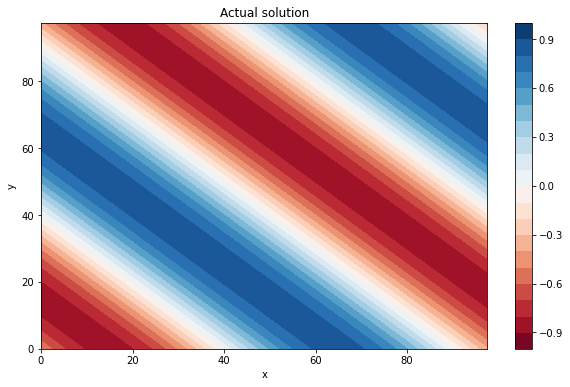

In [5]:
fig = plt.figure(figsize = (10,6))

plt.contourf(X, Y, phi_new, cmap='RdBu',levels = np.linspace(-1,1,21))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual solution')

In [6]:
fig, ax = plt.subplots(figsize = (10,6))

def update_fig(i):
    
    plt.clf()
    plt.title('Tracer variable for time = ' + str(dt*i))
    p1 = plt.contourf(X, Y, phi_data[:,:,i], cmap='RdBu', levels = np.linspace(-1,1,21))
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    return p1

num_frames = int(t_end/dt)
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = False)
anim.save('Videos/2D_AD/2D_Adv.mp4',writer = 'ffmpeg',fps = 8)

plt.close(anim._fig)

In [7]:
Video('Videos/2D_AD/2D_Adv.mp4')

Text(0.5, 1.0, 'Actual solution')

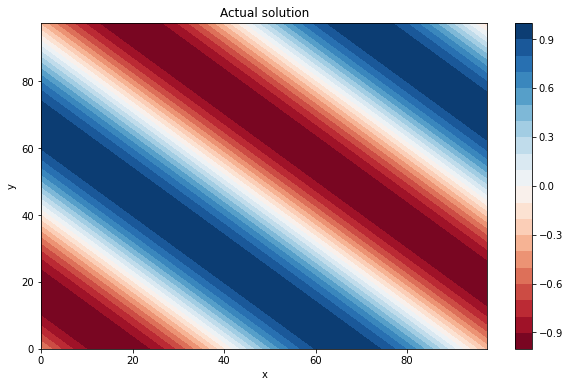

In [8]:
fig = plt.figure(figsize = (10,6))

plt.contourf(X, Y, phi_true, cmap='RdBu',levels = np.linspace(-1,1,21))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Actual solution')

In [9]:
fig, ax = plt.subplots(figsize = (10,6))

def update_fig(i):
    
    plt.clf()
    plt.title('Difference between computed and true solution for time = ' + str(dt*i))
    p1 = plt.contourf(X, Y, (phi_data[:,:,i] - phi_true_data[:,:,i]), cmap='RdBu', levels = np.linspace(-1,1,21))
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    return p1

num_frames = int(t_end/dt)
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = False)
anim.save('Videos/2D_AD/2D_Adv_Error.mp4',writer = 'ffmpeg',fps = 8)

plt.close(anim._fig)

In [10]:
Video('Videos/2D_AD/2D_Adv_Error.mp4')

Text(0.5, 1.0, 'Computed - Actual solution at time = 79 s')

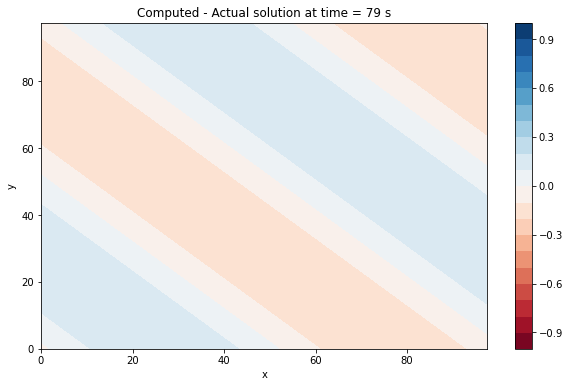

In [11]:
fig = plt.figure(figsize = (10,6))

plt.contourf(X, Y, phi_new - phi_true, cmap='RdBu',levels = np.linspace(-1,1,21))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Computed - Actual solution at time = ' + str(t) + ' s')

We have two animations: (i) Advection using centred difference, and (ii) Error between true and computed solution. We see that the tracer $\phi$ advects as it should in both the directions. This code also has the provision of having two different velocities in each direction, and the wave will adjust itself to the modified inital conditions. The error, when compared with the actual solution, is very less, therefore, we can say that our scheme works.

### Error analysis

In [12]:
Lx, Ly = 100,100
nx = np.array([8,16,32,64,128,256,512,1024])
g = 9.81
rho0 = 1025
error_diff = np.zeros(len(nx))

for i,nxi in enumerate(nx):
    dx = Lx/nxi
    dy = Ly/nxi
    
    lmda1 = 2*np.pi/Lx
    lmda2 = 2*np.pi/Ly
    
    x = np.linspace(0,Lx,nxi+1,dtype = float)
    x = x[0:-1]
    
    y = np.linspace(0,Ly,nxi+1,dtype = float)
    y = y[0:-1]
    
    Y,X = np.meshgrid(y,x)
    
    phi_old = (np.sin(lmda1*X + lmda2*Y))
    phi_new = np.zeros((nxi,nxi))
    
    #Time parameters
    t_start = 0
    t_end = 20
    dt = 0.01

    #Set switch - (i) FD = 1, (ii) BD = -1, (iii) Mix of both = 0
    #By default, switch is set to 0.
    switch_diff_scheme = 0    #Switch for diffusion
    switch_adv_scheme = 1    #Switch for advection

    #Advection speed
    ax,ay = -1,-1

    for t in np.arange(t_start,t_end,dt):
        phi_new = phi_old - dt*elr.adv_x(ax,phi_old,dx,nxi,switch_adv_scheme) - dt*elr.adv_y(
            ay,phi_old,dy,nxi,switch_adv_scheme)
        phi_true = np.sin(lmda1*(X - ax*t) + lmda2*(Y - ay*t))

        phi_old = phi_new

    #Theoretical solution
    phi_true = np.sin(lmda1*(X - ax*t) + lmda2*(Y - ay*t))

    error_iter = np.max(abs(phi_true - phi_old))
    error_diff[i] = error_iter

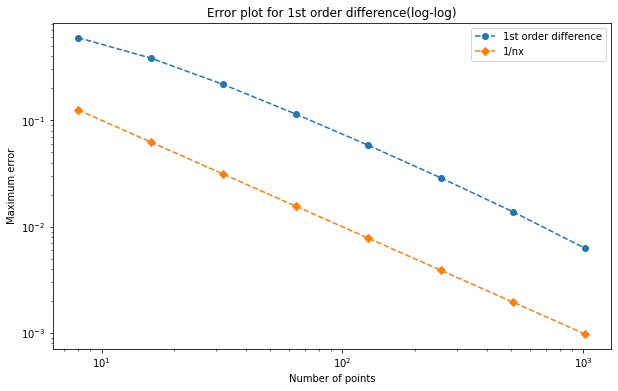

In [13]:
plt.figure(figsize = (10,6))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of points")
plt.ylabel("Maximum error")
plt.plot(nx,error_diff,marker='o',linestyle = '--',label = '1st order difference')
plt.plot(nx, 1/nx, marker = 'D',linestyle = '--', label = '1/nx')
plt.title("Error plot for 1st order difference(log-log)")
plt.legend()
plt.show()

## 2D Diffusion

So far, so good. Again, we take inspiration from the [1D Diffusion](https://github.com/dhruvbhagtani2105/EMSC-8033-project/blob/1D_cases/1D_Diffusion.mp4) case, where we just had an idealised 1D domain, comprising of a diffusivity $\kappa$. For a tracer $\phi$, the 2D diffusion equation can be described as:

$$ \frac{\partial \phi}{\partial t} = \kappa_x \frac{\partial^2 \phi}{\partial x^2} + \kappa_y \frac{\partial^2 \phi}{\partial y^2}, $$

where $\kappa_x$ and $\kappa_y$ are the tracer diffusivities in the x and y direction respectively. One solution to this equation is:

$$ \phi(x,y,t) = e^{-(\lambda_1^2 \kappa_1 + \lambda_2^2 \kappa_2)t} sin(\lambda_1 x + \lambda_2 y),$$

where $\lambda_1 = \frac{2 \pi}{L_x}$ and $\lambda_2 = \frac{2 \pi}{L_y}$. At $t = 0$, we have:

$$ \phi(x,y,0) = sin(\lambda_1 x + \lambda_2 y). $$

In [14]:
#Length of domain
Lx,Ly = 100,100

#Number of points in the domain
nx,ny = 40,40

#Width of each cell
dx = Lx/nx
dy = Ly/ny

g = 9.81
rho0 = 1025

#An array of all points
x = np.linspace(0,Lx,nx+1,dtype = float)
x = x[0:-1]    #Removing last point, needed to implement periodic BC

y = np.linspace(0,Ly,ny+1,dtype = float)
y = y[0:-1]    #Removing last point, needed to implement periodic BC

#Creating a 2D mesh of grid points
Y,X = np.meshgrid(y,x)

In [15]:
#Wavelength of the wave in x and y directions
lmda1 = (2*np.pi)/Lx
lmda2 = (2*np.pi)/Ly

#Initialising arrays
phi_old = (np.sin(lmda1*X + lmda2*Y))
phi_old_t0 = (np.sin(lmda1*X + lmda2*Y))
phi_new = np.zeros(nx)

#Time parameters
t_start = 0
t_end = 60
dt = 1

#Set switch - (i) FD = 1, (ii) BD = -1, (iii) CD = 0
#By default, switch is set to 0.
switch_diff_scheme = 0

#x and y direction diffusivities
kappa1 = 2.0
kappa2 = 2.0

# Needed to create animations
phi_data = np.zeros(((nx,ny,int(t_end/dt) + 1)))
phi_true_data = np.zeros(((nx,ny,int(t_end/dt) + 1)))

for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old + dt*elr.diff_x(kappa1,phi_old,dx,nx) + dt*elr.diff_y(kappa2,phi_old,dy,ny)
    phi_true = np.exp(-lmda1**2 * t * kappa1 - lmda2**2 * t * kappa2) * np.sin(lmda1*X + lmda2*Y)
    
    phi_data[:,:,int(t/dt)] = phi_new
    phi_true_data[:,:,int(t/dt)] = phi_true
    
    phi_old = phi_new

In [16]:
fig, ax = plt.subplots(figsize = (10,6))

def update_fig(i):
    
    plt.clf()
    plt.title('Computed solution at time = ' + str(dt*i))
    p1 = plt.contourf(X, Y, (phi_data[:,:,i]), cmap='RdBu', levels = np.linspace(-1,1,21))
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    return p1

num_frames = int(t_end/dt)
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = False)
anim.save('Videos/2D_AD/2D_Diff.mp4',writer = 'ffmpeg',fps = 8)

plt.close(anim._fig)

Video('Videos/2D_AD/2D_Diff.mp4')

Text(0.5, 1.0, 'Numerical solution at time = 59 s')

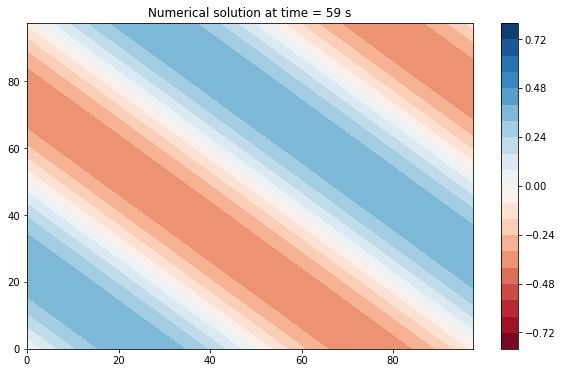

In [17]:
fig = plt.figure(figsize = (10,6))

plt.contourf(X, Y, phi_new, cmap='RdBu', levels = np.linspace(-0.8,0.8,21))
plt.colorbar()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Numerical solution at time = ' + str(t) + ' s')

In [18]:
fig, ax = plt.subplots(figsize = (10,6))

def update_fig(i):
    
    plt.clf()
    plt.title('Difference between computed and true solution for time = ' + str(dt*i))
    p1 = plt.contourf(X, Y, (phi_data[:,:,i] - phi_true_data[:,:,i]), cmap='RdBu', levels = np.linspace(-0.1,0.1,21))
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    return p1

num_frames = int(t_end/dt)
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = False)
anim.save('Videos/2D_AD/2D_Diff_Error.mp4',writer = 'ffmpeg',fps = 8)

plt.close(anim._fig)

Video('Videos/2D_AD/2D_Diff_Error.mp4')

Text(0.5, 1.0, 'Difference between true and numerical solution')

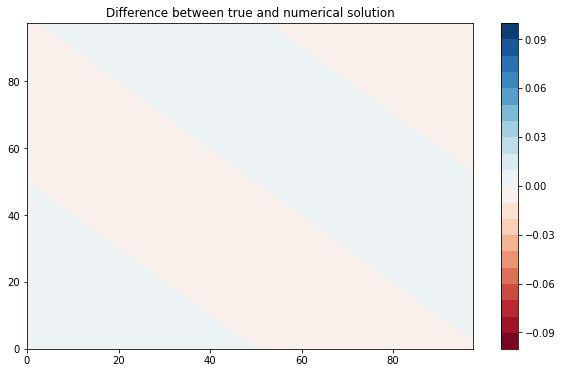

In [19]:
fig = plt.figure(figsize = (10,6))

plt.contourf(X, Y, phi_true - phi_new, cmap='RdBu', levels = np.linspace(-0.1,0.1,21))
plt.colorbar()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Difference between true and numerical solution')

The results we obtain are similar to the 2D advection case - we have two animations, one showing a centred difference scheme, and the other plotting the error between the true and numerical solution. The errors are very less throughout the simulation, so our scheme is stable. We move on to the case where we can apply both advection and diffusion simultaneously.

### Error analysis

In [20]:
Lx, Ly = 100,100
nx = np.array([4,8,16,32,64,128])
g = 9.81
rho0 = 1025
error_diff = np.zeros(len(nx))

for i,nxi in enumerate(nx):
    dx = Lx/nxi
    dy = Ly/nxi
    
    lmda1 = 2*np.pi/Lx
    lmda2 = 2*np.pi/Ly
    
    x = np.linspace(0,Lx,nxi+1,dtype = float)
    x = x[0:-1]
    
    y = np.linspace(0,Ly,nxi+1,dtype = float)
    y = y[0:-1]
    
    Y,X = np.meshgrid(y,x)
    
    phi_old = (np.sin(lmda1*X + lmda2*Y))
    phi_new = np.zeros((nxi,nxi))
    
    #Time parameters
    t_start = 0
    t_end = 20
    dt = 0.001

    #Set switch - (i) FD = 1, (ii) BD = -1, (iii) Mix of both = 0
    #By default, switch is set to 0.
    switch_diff_scheme = 0    #Switch for diffusion
    switch_adv_scheme = 1    #Switch for advection
    
    #x and y direction diffusivities
    kappa1 = 2.0
    kappa2 = 2.0

    for t in np.arange(t_start,t_end,dt):
        phi_new = phi_old + dt*elr.diff_x(kappa1,phi_old,dx,nxi) + dt*elr.diff_y(kappa2,phi_old,dy,nxi)
        phi_true = np.exp(-lmda1**2 * t * kappa1 - lmda2**2 * t * kappa2) * np.sin(lmda1*X + lmda2*Y)

        phi_old = phi_new
        
    error_iter = np.max(abs(phi_true - phi_old))
    error_diff[i] = error_iter

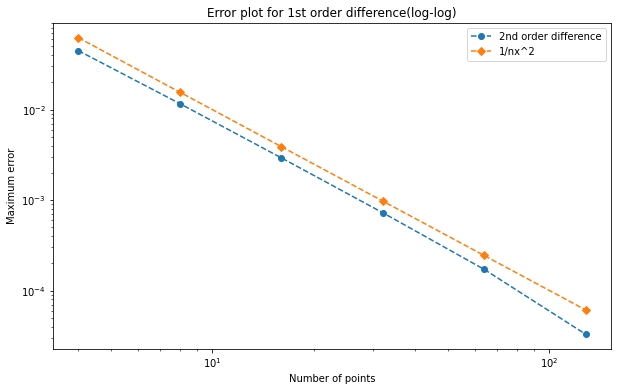

In [21]:
plt.figure(figsize = (10,6))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of points")
plt.ylabel("Maximum error")
plt.plot(nx,error_diff,marker='o',linestyle = '--',label = '2nd order difference')
plt.plot(nx, 1/nx**2, marker = 'D',linestyle = '--', label = '1/nx^2')
plt.title("Error plot for 1st order difference(log-log)")
plt.legend()
plt.show()

## 2D advection-diffusion

Alright, now that we have tested advection and diffusion individually, we try to evaluate a situation where both these processes are happening simultaneouly for a 2D domain, something which we have already done for the 1D case in [1D Advection-Diffusion](https://github.com/dhruvbhagtani2105/EMSC-8033-project/blob/1D_cases/1D_Advection_Diffusion.ipynb). Therefore, for a tracer $\phi$, we can write this as:

$$ \frac{\partial \phi}{\partial t} + a_1 \frac{\partial \phi}{\partial x} + a_2 \frac{\partial \phi}{\partial y} = \kappa_1 \frac{\partial^2 \phi}{\partial x^2} + \kappa_2 \frac{\partial^2 \phi}{\partial y^2}.$$

A solution to this equation is:

$$ \phi(x,y,t) = e^{-(\lambda_1^2 \kappa_1 + \lambda_2^2 \kappa_2)t} sin(\lambda_1 (x - a_1 t) + \lambda_2 (y - a_2 t)),$$

and for $t = 0$, we have:

$$ \phi(x,y,0) = sin(\lambda_1 x + \lambda_2 y) .$$

In [30]:
#Length of domain
Lx,Ly = 100,100

#Number of points in the domain
nx,ny = 40,40

#Width of each cell
dx = Lx/nx
dy = Ly/ny

g = 9.81
rho0 = 1025

#An array of all points
x = np.linspace(0,Lx,nx+1,dtype = float)
x = x[0:-1]     #Removing last point, needed to implement periodic BC

y = np.linspace(0,Ly,ny+1,dtype = float)
y = y[0:-1]     #Removing last point, needed to implement periodic BC

Y,X = np.meshgrid(y,x)

In [31]:
#Wavelength of the wave in x and y directions
lmda1 = (2*np.pi)/Lx
lmda2 = (2*np.pi)/Ly

#Initialising arrays
phi_old = (np.sin(lmda1*X + lmda2*Y))
phi_old_t0 = (np.sin(lmda1*X + lmda2*Y))
phi_new = np.zeros((nx,ny))

#Time parameters
t_start = 0
t_end = 40
dt = 0.1

#Set switch - (i) FD = 1, (ii) BD = -1, (iii) CD = 0
#By default, switch is set to 0.
switch_diff_scheme = 0
switch_adv_scheme = -1

#x and y direction diffusivities and advection speeds
kappax = 1.0
kappay = 1.0
ax = 1
ay = 1

# Needed to create animations
phi_data = np.zeros(((nx,ny,int(t_end/dt) + 1)))
phi_true_data = np.zeros(((nx,ny,int(t_end/dt) + 1)))

for t in np.arange(t_start,t_end,dt):
    phi_new = phi_old + dt*elr.diff_x(kappax,phi_old,dx,nx) + dt*elr.diff_y(
        kappay,phi_old,dy,ny) - dt*elr.adv_x(ax,phi_old,dx,nx,switch_adv_scheme) - dt*elr.adv_y(
        ay,phi_old,dy,ny,switch_adv_scheme)
    phi_true = np.exp(-lmda1**2 * t * kappax - lmda2**2 * t * kappay) * np.sin(lmda1*(X-ax*t) + lmda2*(Y-ay*t))
    
    phi_data[:,:,int(t/dt)] = phi_new
    phi_true_data[:,:,int(t/dt)] = phi_true
    
    phi_old = phi_new

In [32]:
fig, ax = plt.subplots(figsize = (10,6))

def update_fig(i):
    
    plt.clf()
    plt.title('Computed solution at time = ' + str(i*5*dt))
    p1 = plt.contourf(X, Y, (phi_data[:,:,i*5]), cmap='RdBu', levels = np.linspace(-1,1,21))
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    return p1

num_frames = 80
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = False)
anim.save('Videos/2D_AD/2D_Adv_Diff.mp4',writer = 'ffmpeg',fps = 16)

plt.close(anim._fig)

Video('Videos/2D_AD/2D_Adv_Diff.mp4')

Text(0.5, 1.0, 'Actual solution')

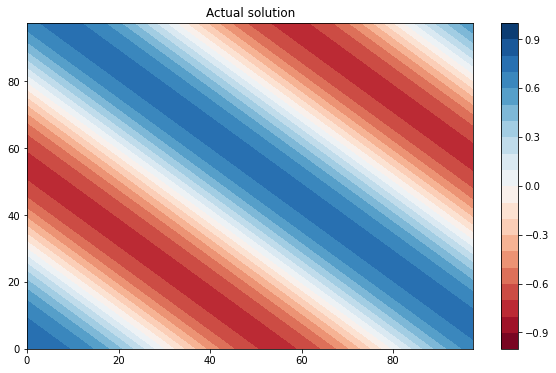

In [33]:
fig = plt.figure(figsize = (10,6))

plt.contourf(X, Y, phi_true, cmap='RdBu', levels = np.linspace(-1,1,21))
plt.colorbar()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Actual solution')

In [35]:
fig, ax = plt.subplots(figsize = (10,6))

def update_fig(i):
    
    plt.clf()
    plt.title('Difference between computed and true solution for time = ' + str(dt*i*5))
    p1 = plt.contourf(X, Y, (phi_data[:,:,i*5] - phi_true_data[:,:,i*5]), cmap='RdBu', levels = np.linspace(-1,1,21))
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    return p1

num_frames = 80
anim = animation.FuncAnimation(fig, update_fig, frames = num_frames, blit = False)
anim.save('Videos/2D_AD/2D_Adv_Diff_Error.mp4',writer = 'ffmpeg',fps = 16)

plt.close(anim._fig)

Video('Videos/2D_AD/2D_Adv_Diff_Error.mp4')

Text(0.5, 1.0, 'Difference between true and numerical solution')

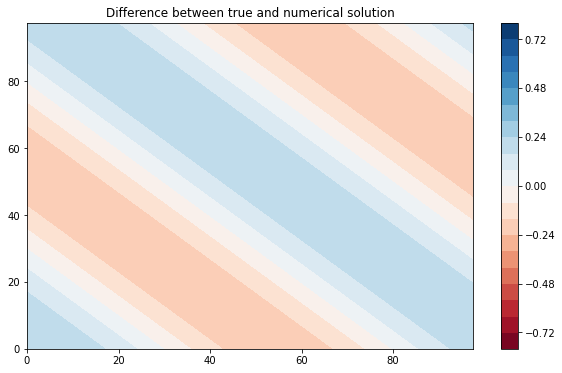

In [27]:
fig = plt.figure(figsize = (10,6))

plt.contourf(X, Y, phi_true - phi_new, cmap='RdBu', levels = np.linspace(-0.8,0.8,21))
plt.colorbar()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Difference between true and numerical solution')

We successfully coded for the 2D case in the presence of both advection and diffusion. The errors are within limits, and graphically, we can see in the animation that the solution is both advecting and diffusing.

### Error analysis

In [28]:
Lx, Ly = 100,100
nx = np.array([8,16,32,64,128,256,512])
g = 9.81
rho0 = 1025
error_diff = np.zeros(len(nx))

for i,nxi in enumerate(nx):
    dx = Lx/nxi
    dy = Ly/nxi
    
    lmda1 = 2*np.pi/Lx
    lmda2 = 2*np.pi/Ly
    
    x = np.linspace(0,Lx,nxi+1,dtype = float)
    x = x[0:-1]
    
    y = np.linspace(0,Ly,nxi+1,dtype = float)
    y = y[0:-1]
    
    Y,X = np.meshgrid(y,x)
    
    phi_old = (np.sin(lmda1*X + lmda2*Y))
    phi_new = np.zeros((nxi,nxi))
    
    #Time parameters
    t_start = 0
    t_end = 20
    dt = 0.001

    #Set switch - (i) FD = 1, (ii) BD = -1, (iii) Mix of both = 0
    #By default, switch is set to 0.
    switch_diff_scheme = 0    #Switch for diffusion
    switch_adv_scheme = 0    #Switch for advection
    
    #x and y direction diffusivities
    kappax = 2.0
    kappay = 2.0
    
    #x and y advection speeds
    ax = 1
    ay = 1
    
    for t in np.arange(t_start,t_end,dt):
        phi_new = phi_old + dt*elr.diff_x(kappax,phi_old,dx,nxi) + dt*elr.diff_y(
            kappay,phi_old,dy,nxi) - dt*elr.adv_x(ax,phi_old,dx,nxi,switch_adv_scheme) - dt*elr.adv_y(
            ay,phi_old,dy,nxi,switch_adv_scheme)
        phi_true = np.exp(-lmda1**2 * t * kappax - lmda2**2 * t * kappay) * np.sin(lmda1*(X-ax*t) + lmda2*(Y-ay*t))

        phi_old = phi_new
        
    error_iter = np.max(abs(phi_true - phi_old))
    error_diff[i] = error_iter

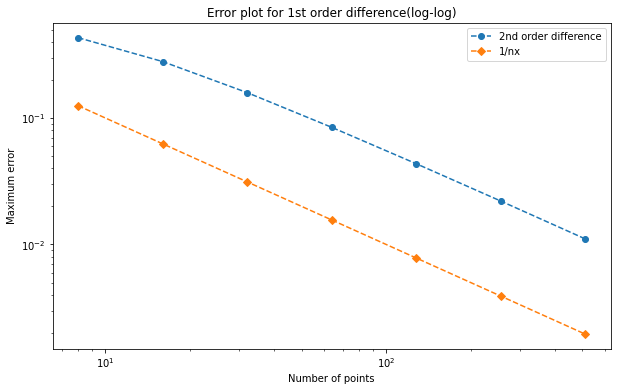

In [29]:
plt.figure(figsize = (10,6))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of points")
plt.ylabel("Maximum error")
plt.plot(nx,error_diff,marker='o',linestyle = '--',label = '2nd order difference')
plt.plot(nx, 1/nx, marker = 'D',linestyle = '--', label = '1/nx')
plt.title("Error plot for 1st order difference(log-log)")
plt.legend()
plt.show()